In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string

In [ ]:
data=pd.read_csv('/content/twitter_training.csv',on_bad_lines='skip')

In [ ]:
data.shape

(66504, 4)

In [ ]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
data.rename(columns={"im getting on borderlands and i will murder you all ,":'Sentence'},inplace=True)

In [ ]:
data.rename(columns={"Positive":"Sentiment"},inplace=True)

In [ ]:
data.drop('2401' ,axis=1,inplace=True)

In [ ]:
data.head()

,Borderlands,Sentiment,Sentence
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


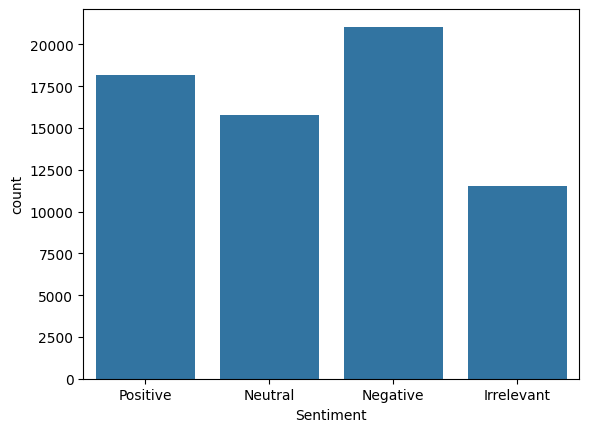

In [ ]:
sns.countplot(x='Sentiment',data=data)
plt.show()

In [ ]:
!python3 -m pip install nltk

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('Vader_lexicon')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
text="hye my name is iman fatima"
token=word_tokenize(text)
print(token)

['hye', 'my', 'name', 'is', 'iman', 'fatima']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading Vader_lexicon: Package 'Vader_lexicon' not
[nltk_data]     found in index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:


from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()



In [ ]:
sia.polarity_scores("i hate you ")

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

In [ ]:
sia.polarity_scores(" i like him")

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

In [ ]:
sia.polarity_scores("this is worst  thing ever")

{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
data['compound'] = [sia.polarity_scores(str(x))['compound'] for x in data['Sentiment']]

In [ ]:
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the 'Sentences' column
data['Sentiment'] = data['Sentence'].apply(lambda x: "Positive" if isinstance(x, str) and sia.polarity_scores(x)['compound'] > 0.05
                                         else ("Negative" if isinstance(x, str) and sia.polarity_scores(x)['compound'] < -0.05
                                               else "Neutral"))

# Now your DataFrame 'df' has a new column 'sentiment' with the sentiment labels
print(data[['Sentence', 'Sentiment']])


                                                Sentence Sentiment
0      I am coming to the borders and I will kill you...  Negative
1      im getting on borderlands and i will kill you ...  Negative
2      im coming on borderlands and i will murder you...  Negative
3      im getting on borderlands 2 and i will murder ...  Negative
4      im getting into borderlands and i can murder y...  Negative
...                                                  ...       ...
66499  Just realized that the Windows partition of my...  Positive
66500  Just realized that my Mac window partition is ...  Negative
66501  Just realized the windows partition of my Mac ...  Negative
66502  Just realized between the windows partition of...  Positive
66503  Just like the windows partition of my Mac is l...  Positive

[66504 rows x 2 columns]


In [ ]:
data.head(10)

,Borderlands,Sentiment,Sentence,compound
0,Borderlands,Negative,I am coming to the borders and I will kill you...,0.5574
1,Borderlands,Negative,im getting on borderlands and i will kill you ...,0.5574
2,Borderlands,Negative,im coming on borderlands and i will murder you...,0.5574
3,Borderlands,Negative,im getting on borderlands 2 and i will murder ...,0.5574
4,Borderlands,Negative,im getting into borderlands and i can murder y...,0.5574
5,Borderlands,Positive,So I spent a few hours making something for fu...,0.5574
6,Borderlands,Positive,So I spent a couple of hours doing something f...,0.5574
7,Borderlands,Positive,So I spent a few hours doing something for fun...,0.5574
8,Borderlands,Positive,So I spent a few hours making something for fu...,0.5574
9,Borderlands,Positive,2010 So I spent a few hours making something f...,0.5574


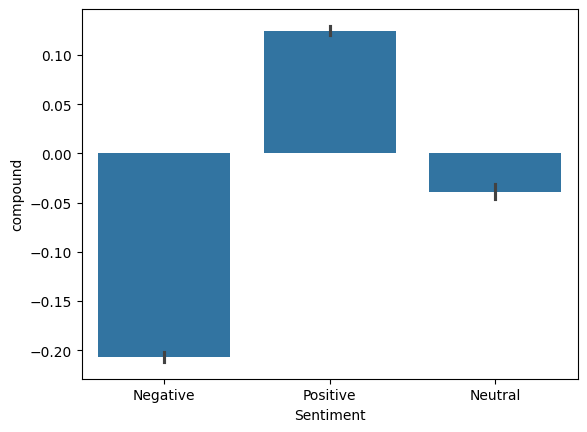

In [ ]:
 sns.barplot(x='Sentiment', y='compound',data=data)
 plt.show()

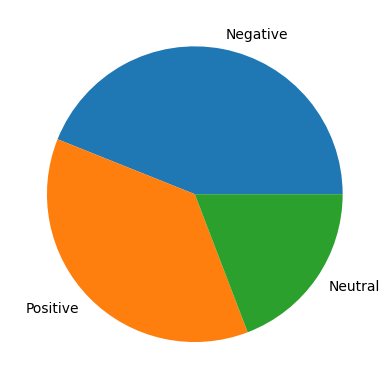

In [ ]:
plt.pie(data['Sentiment'].value_counts(),labels=data['Sentiment'].unique(),data=data)
plt.show()

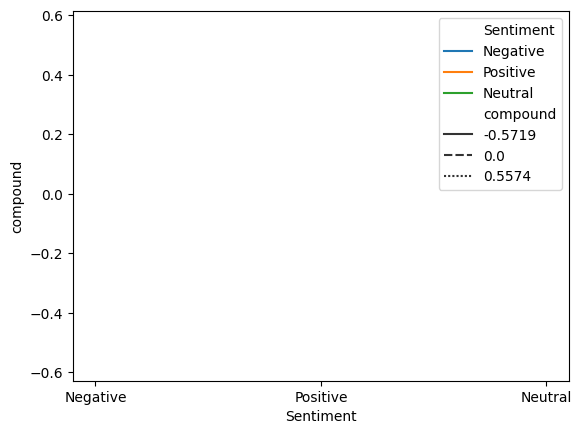

In [ ]:
sns.lineplot(x="Sentiment", y="compound", hue="Sentiment", style='compound', data=data)
plt.show()